In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import statsmodels.api as sm
from datetime import datetime
from scipy import stats
from LOTUS_regression.regression import mzm_regression
from LOTUS_regression.predictors import load_data
from LOTUS_regression.predictors.seasonal import add_seasonal_components
import LOTUS_regression.tests as tests

In [5]:
columnStr = ['year','month', 'Obsflux', 'Adjflux', 'Absflux']

#df = pd.read_csv('/Volumes/HD3/KMI/MLR_Uccle/Files/teleconnection_indices/solflux_monthly_average2018.txt',
#                   sep = "\s *", engine="python", skiprows=1, names=columnStr)
df = pd.read_csv('/home/poyraden/MLR_Uccle/Codes/Files/teleconnection_indices/solflux_Lotus.txt',
                   sep = "\s*", engine="python", skiprows=1, names=columnStr)
df[0:10], len(df)



/home/poyraden/anaconda3/lib/python3.6/site-packages/pandas/io/parsers.py:2379: FutureWarning: split() requires a non-empty pattern match.
  yield pat.split(line.strip())
/home/poyraden/anaconda3/lib/python3.6/site-packages/pandas/io/parsers.py:2381: FutureWarning: split() requires a non-empty pattern match.
  yield pat.split(line.strip())


(   year  month  Obsflux  Adjflux  Absflux
 0  2004     11   115.98   113.46   102.12
 1  2004     12    95.66    92.69    83.42
 2  2005      1   102.86    99.59    89.63
 3  2005      2    97.30    94.95    85.45
 4  2005      3    90.04    89.14    80.22
 5  2005      4    85.92    86.55    77.90
 6  2005      5   101.65   103.90    93.50
 7  2005      6    94.09    97.06    87.36
 8  2005      7   100.64   103.93    93.54
 9  2005      8    98.24   100.66    90.60, 175)

In [6]:
y = np.asarray(df.year.tolist())
m = np.asarray(df.month.tolist())
date = ['']*len(y)

for i in range(len(y)):
    date[i] = str(y[i])+ '-' + str(m[i]) + '-01'
date[300:320]

df['date'] =  pd.to_datetime(date, format='%Y-%m')

df.set_index('date', inplace=True)

df = df.drop(columns='year')
df = df.drop(columns='month')
#df = df.loc['1977-02-01':'2017-06-01']

df[0:10]

,Obsflux,Adjflux,Absflux
date,,,
2004-11-01,115.98,113.46,102.12
2004-12-01,95.66,92.69,83.42
2005-01-01,102.86,99.59,89.63
2005-02-01,97.30,94.95,85.45
2005-03-01,90.04,89.14,80.22
2005-04-01,85.92,86.55,77.90
2005-05-01,101.65,103.90,93.50
2005-06-01,94.09,97.06,87.36
2005-07-01,100.64,103.93,93.54


In [7]:
year_dif = (pd.Timestamp('2017-06-01') - pd.Timestamp('1977-02-01'))/np.timedelta64(1,'Y')
year_dif

40.32937021294072

In [8]:
jan = [[0] * 40] *3;feb = [[0] * 40] *3;mar = [[0] * 40] *3;apr = [[0] * 40] *3;may = [[0] * 40] *3;jun = [[0] * 40] *3;
jul = [[0] * 40] *3;aug = [[0] * 40] *3;sep = [[0] * 40] *3;oct = [[0] * 40] *3;nov = [[0] * 40] *3;dec = [[0] * 40] *3

jan_mean = [0] * 3;feb_mean = [0] * 3;mar_mean = [0] * 3;apr_mean = [0] * 3;may_mean = [0] * 3;jun_mean = [0] * 3;
jul_mean = [0] * 3;aug_mean = [0] * 3;sep_mean = [0] * 3;oct_mean = [0] * 3;nov_mean = [0] * 3;dec_mean = [0] * 3

In [9]:
uct = {}

alt = ['Obsflux','Adjflux','Absflux']
alt2 = ['Obsflux_ds','Adjflux_ds','Absflux_ds']


for ir in range(3):  # per each km
    
    uct[ir] = df
    
    jan[ir].clear();
    feb[ir].clear();
    mar[ir].clear();
    apr[ir].clear();
    may[ir].clear();
    jun[ir].clear()
    jul[ir].clear();
    aug[ir].clear();
    sep[ir].clear();
    oct[ir].clear();
    nov[ir].clear();
    dec[ir].clear()

    for i in (uct[ir][alt[ir]].index):

        if (pd.Timestamp(i).month == 1):
            #print('hey',alt[ir],  i, (uct[ir][alt[ir]].loc[pd.Timestamp(i)]))
            jan[ir].append(uct[ir][alt[ir]].loc[pd.Timestamp(i)])
            jan[ir] = list(filter(lambda a: a != 0, jan[ir]))
        if (pd.Timestamp(i).month == 2):
            feb[ir].append(uct[ir][alt[ir]].loc[pd.Timestamp(i)])
            feb[ir] = list(filter(lambda a: a != 0, feb[ir]))
        if (pd.Timestamp(i).month == 3):
            mar[ir].append(uct[ir][alt[ir]].loc[pd.Timestamp(i)])
            mar[ir] = list(filter(lambda a: a != 0, mar[ir]))
        if (pd.Timestamp(i).month == 4):
            apr[ir].append(uct[ir][alt[ir]].loc[pd.Timestamp(i)])
            apr[ir] = list(filter(lambda a: a != 0, apr[ir]))
        if (pd.Timestamp(i).month == 5):
            may[ir].append(uct[ir][alt[ir]].loc[pd.Timestamp(i)])
            may[ir] = list(filter(lambda a: a != 0, may[ir]))
        if (pd.Timestamp(i).month == 6):
            jun[ir].append(uct[ir][alt[ir]].loc[pd.Timestamp(i)])
            jun[ir] = list(filter(lambda a: a != 0, jun[ir]))
        if (pd.Timestamp(i).month == 7):
            jul[ir].append(uct[ir][alt[ir]].loc[pd.Timestamp(i)])
            jul[ir] = list(filter(lambda a: a != 0, jul[ir]))
        if (pd.Timestamp(i).month == 8):
            aug[ir].append(uct[ir][alt[ir]].loc[pd.Timestamp(i)])
            aug[ir] = list(filter(lambda a: a != 0, aug[ir]))
        if (pd.Timestamp(i).month == 9):
            sep[ir].append(uct[ir][alt[ir]].loc[pd.Timestamp(i)])
            sep[ir] = list(filter(lambda a: a != 0, sep[ir]))
        if (pd.Timestamp(i).month == 10):
            oct[ir].append(uct[ir][alt[ir]].loc[pd.Timestamp(i)])
            oct[ir] = list(filter(lambda a: a != 0, oct[ir]))
        if (pd.Timestamp(i).month == 11):
            nov[ir].append(uct[ir][alt[ir]].loc[pd.Timestamp(i)])
            nov[ir] = list(filter(lambda a: a != 0, nov[ir]))
        if (pd.Timestamp(i).month == 12):
            dec[ir].append(uct[ir][alt[ir]].loc[pd.Timestamp(i)])
            dec[ir] = list(filter(lambda a: a != 0, dec[ir]))

        jan_mean[ir] = np.nanmean(jan[ir])
        feb_mean[ir] = np.nanmean(feb[ir])
        mar_mean[ir] = np.nanmean(mar[ir])
        apr_mean[ir] = np.nanmean(apr[ir])
        may_mean[ir] = np.nanmean(may[ir])
        jun_mean[ir] = np.nanmean(jun[ir])
        jul_mean[ir] = np.nanmean(jul[ir])
        aug_mean[ir] = np.nanmean(aug[ir])
        sep_mean[ir] = np.nanmean(sep[ir])
        oct_mean[ir] = np.nanmean(oct[ir])
        nov_mean[ir] = np.nanmean(nov[ir])
        dec_mean[ir] = np.nanmean(dec[ir])
print(jan_mean[0], dec_mean[0])
print(jan_mean[2], dec_mean[2])

/home/poyraden/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:64: RuntimeWarning: Mean of empty slice
/home/poyraden/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:65: RuntimeWarning: Mean of empty slice
/home/poyraden/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:66: RuntimeWarning: Mean of empty slice
/home/poyraden/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:67: RuntimeWarning: Mean of empty slice
/home/poyraden/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:68: RuntimeWarning: Mean of empty slice
/home/poyraden/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:69: RuntimeWarning: Mean of empty slice
/home/poyraden/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:70: RuntimeWarning: Mean of empty slice
/home/poyraden/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:71: RuntimeWarning: Mean of empty slice
/home/poyraden/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:72: R

97.818 98.1073333333
85.228 85.5466666667


In [10]:
print('january', len(jan[0]), np.mean(jan[0]), jan[0])
print('augustust', len(aug[0]), np.mean(aug[0]), aug[0])
print('next',jan_mean[0],aug_mean[0], dec_mean[0])

january 15 97.818 [102.86, 83.319999999999993, 83.760000000000005, 74.019999999999996, 69.700000000000003, 81.310000000000002, 83.390000000000001, 134.78999999999999, 126.83, 162.69, 142.0, 103.64, 77.370000000000005, 70.010000000000005, 71.579999999999998]
augustust 14 89.6328571429 [98.239999999999995, 79.590000000000003, 69.030000000000001, 66.170000000000002, 67.359999999999999, 79.159999999999997, 101.61, 115.86, 114.90000000000001, 124.56, 105.93000000000001, 85.150000000000006, 78.25, 69.049999999999997]
next 97.818 89.6328571429 98.1073333333


In [18]:
uct2 = {}
dfde = pd.DataFrame()

for ir2 in range(3):  
    
    uct2[ir2] = df
   
    for i2 in (uct2[ir2][alt[ir2]].index):
        if (pd.Timestamp(i2).month == 1):
            uct2[ir2][alt[ir2]].loc[pd.Timestamp(i2)] = (uct2[ir2][alt[ir2]].loc[pd.Timestamp(i2)] - jan_mean[ir2])/jan_mean[ir2]
            #print(i2, pd.Timestamp(i2),uct2[ir2][alt[ir2]].loc[pd.Timestamp(i2)]  )
        if (pd.Timestamp(i2).month == 2):
            uct2[ir2][alt[ir2]].loc[pd.Timestamp(i2)] = (uct2[ir2][alt[ir2]].loc[pd.Timestamp(i2)] - feb_mean[ir2])/feb_mean[ir2]
        if (pd.Timestamp(i2).month == 3):
            uct2[ir2][alt[ir2]].loc[pd.Timestamp(i2)] = (uct2[ir2][alt[ir2]].loc[pd.Timestamp(i2)] - mar_mean[ir2])/mar_mean[ir2]
        if (pd.Timestamp(i2).month == 4):
            uct2[ir2][alt[ir2]].loc[pd.Timestamp(i2)] = (uct2[ir2][alt[ir2]].loc[pd.Timestamp(i2)] - apr_mean[ir2])/apr_mean[ir2]
        if (pd.Timestamp(i2).month == 5):
            uct2[ir2][alt[ir2]].loc[pd.Timestamp(i2)] = (uct2[ir2][alt[ir2]].loc[pd.Timestamp(i2)] - may_mean[ir2])/may_mean[ir2]
        if (pd.Timestamp(i2).month == 6):
            uct2[ir2][alt[ir2]].loc[pd.Timestamp(i2)] = (uct2[ir2][alt[ir2]].loc[pd.Timestamp(i2)] - jun_mean[ir2])/jun_mean[ir2]
        if (pd.Timestamp(i2).month == 7):
            uct2[ir2][alt[ir2]].loc[pd.Timestamp(i2)] = (uct2[ir2][alt[ir2]].loc[pd.Timestamp(i2)] - jul_mean[ir2])/jul_mean[ir2]
        if (pd.Timestamp(i2).month == 8):
            uct2[ir2][alt[ir2]].loc[pd.Timestamp(i2)] = (uct2[ir2][alt[ir2]].loc[pd.Timestamp(i2)] - aug_mean[ir2])/aug_mean[ir2]
        if (pd.Timestamp(i2).month == 9):
            uct2[ir2][alt[ir2]].loc[pd.Timestamp(i2)] = (uct2[ir2][alt[ir2]].loc[pd.Timestamp(i2)] - sep_mean[ir2])/sep_mean[ir2]
        if (pd.Timestamp(i2).month == 10):
            uct2[ir2][alt[ir2]].loc[pd.Timestamp(i2)] = (uct2[ir2][alt[ir2]].loc[pd.Timestamp(i2)] - oct_mean[ir2])/oct_mean[ir2]
        if (pd.Timestamp(i2).month == 11):
            uct2[ir2][alt[ir2]].loc[pd.Timestamp(i2)] = (uct2[ir2][alt[ir2]].loc[pd.Timestamp(i2)] - nov_mean[ir2])/nov_mean[ir2]
        if (pd.Timestamp(i2).month == 12):
            uct2[ir2][alt[ir2]].loc[pd.Timestamp(i2)] = (uct2[ir2][alt[ir2]].loc[pd.Timestamp(i2)] - dec_mean[ir2])/dec_mean[ir2]


    #print('wh', ir2, alt[ir2],'uct',uct[ir2][alt[ir2]],'uct2',uct2[ir2][alt[ir2]])

    dfde[alt2[ir2]] = uct2[ir2][alt[ir2]]

dfde

,Obsflux_ds,Adjflux_ds,Absflux_ds
date,,,
2004-11-01,-1.010039,-1.010263,-1.011401
2004-12-01,-1.010196,-1.010524,-1.011693
2005-01-01,-1.010218,-1.010554,-1.011726
2005-02-01,-1.010673,-1.010937,-1.012152
2005-03-01,-1.010738,-1.010848,-1.012054
2005-04-01,-1.010694,-1.010619,-1.011800
2005-05-01,-1.010880,-1.010645,-1.011827
2005-06-01,-1.011114,-1.010774,-1.011971
2005-07-01,-1.010864,-1.010521,-1.011688


In [12]:
dfde.loc['1980-01-01':'1981-01-01']

,Obsflux_ds,Adjflux_ds,Absflux_ds
date,,,


In [13]:
df.loc['1990-01-01':'1991-01-01']

,Obsflux,Adjflux,Absflux
date,,,


In [64]:
dfde[dfde['Obsflux_ds'] > 0]

,Obsflux_ds,Adjflux_ds,Absflux_ds
date,,,
1978-02-01,0.135475,0.135298,0.135311
1978-03-01,0.135410,0.134669,0.134732
1978-04-01,0.216269,0.217959,0.217936
1978-05-01,0.221843,0.221561,0.221817
1978-06-01,0.196530,0.196769,0.196692
1978-07-01,0.092804,0.092845,0.092816
1978-09-01,0.276076,0.276189,0.276186
1978-10-01,0.243099,0.243197,0.243226
1978-11-01,0.163610,0.163888,0.163862


['enso', 'trop', 'solar', 'qboA', 'qboB', 'aod', 'linear_pre', 'linear_post', 'pre_const', 'post_const', 'gap_cons']


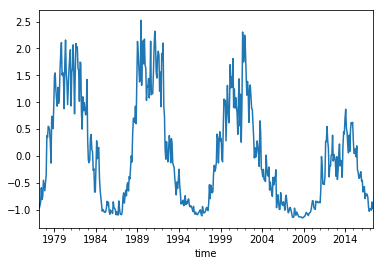

In [15]:
predictors = load_data('pred_baseline_ilt.csv')
print(list(predictors))
predictors.solar.plot()

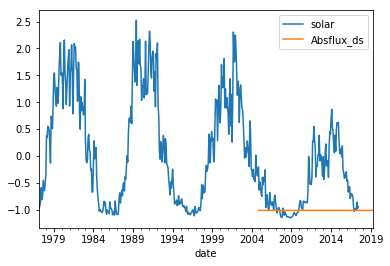

In [28]:
predictors.solar.plot(legend = 'pp')
dfde.Absflux_ds_times5 = dfde.Absflux_ds *5
dfde.Absflux_ds.plot(legend = 'deniz')
#dfde.Absflux_ds_times5.plot(legend = 'deniz')

plt.savefig('Solar_lotus_table.pdf')

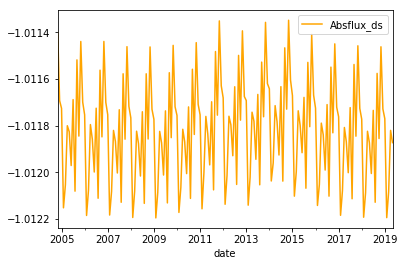

In [29]:
dfde.Absflux_ds.plot(legend  ='p', color ='orange')
plt.savefig('Solar_lotus_table2.pdf')

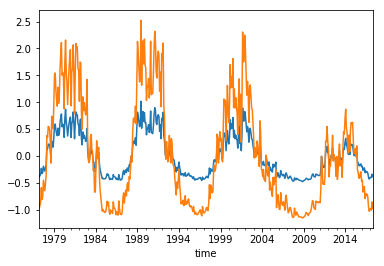

In [68]:
dfde.Adjflux_ds.plot()
predictors.solar.plot()

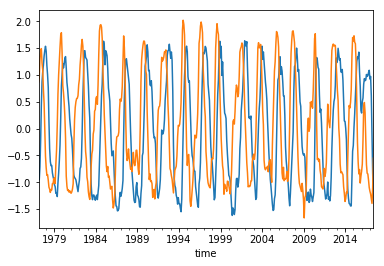

In [69]:
predictors.qboA.plot()
predictors.qboB.plot()
